# Modeling Driven RLC Circuit with Experimental Data and Computational Mode

In [41]:
import matplotlib.pyplot as plt
# Import Libraries
import pandas as pd
import math
import numpy as np
from Unit0 import model_utils
import statistics
from tqdm import tqdm

In [42]:
# Constants
resistance = [45.7]
inductance = 0.02421893575
capacitance = [0.00001, 0.000001, 0.0000001]
voltage = [5]
frequency_initial = 10
frequency_final = 6000

In [43]:
def compute_models(resistance, inductance, capacitances, voltage):
    responseCurves = []

    for i in range(len(capacitances)):
        capacitance = capacitances[i]
        def compute_model(frequency):
            angular_frequency = 2 * math.pi * frequency

            def compute_acceleration(t, charge, current, _current_prime):
                return voltage * math.sin(angular_frequency * t) / inductance / 2 - resistance * current / inductance - charge / (inductance * capacitance) - 0.05 * current / (angular_frequency * inductance * capacitance)

            times = np.linspace(0, 0.1, 10001)
            _, _, current, _ = model_utils.euler_method(compute_acceleration, times=times)

            # Calculate the amplitude by checking the max value in the last five seconds
            return max(current[-5000:])

        frequencies = np.linspace(frequency_initial, frequency_final, 600)
        amplitudes = list(map(compute_model, tqdm(frequencies)))

        # Graph frequency vs amplitude
        responseCurves.append((frequencies, amplitudes, f"Computational {(int(capacitance * 1000000), round(capacitance * 1000000, 1))[capacitance < 0.000001]}µF"))
        model_utils.graph([(frequencies, amplitudes, "")], "Amplitude", "A", "Frequency", "Hz", "Computational", f"{resistance}Ω {round(inductance * 1000, 2)}mH {(int(capacitance * 1000000), round(capacitance * 1000000, 1))[capacitance < 0.000001]}µF {voltage}V", ".", f"Graphs/Computational/ResponseCurve_{resistance}Ω_{round(inductance * 1000, 2)}mH_{(int(capacitance * 1000000), round(capacitance * 1000000, 1))[capacitance < 0.000001]}µF_{voltage}V")

        data = pd.read_csv(f"Data/AmplitudeFrequency/Driven RLC {resistance}Ω {round(inductance * 1000, 2)}mH {(int(capacitance * 1000000), round(capacitance * 1000000, 1))[capacitance < 0.000001]}µF {voltage}V amplitude.csv")
        responseCurves.append((data["Frequency (Hz)"], data["Amplitude (A)"], f"Experimental {(int(capacitance * 1000000), round(capacitance * 1000000, 1))[capacitance < 0.000001]}µF"))
        model_utils.graph([(frequencies, amplitudes, "Computational"), (data["Frequency (Hz)"], data["Amplitude (A)"], "Experimental")], "Amplitude", "A", "Frequency", "Hz", name_suffix=f"{resistance}Ω {round(inductance * 1000, 2)}mH {(int(capacitance * 1000000), round(capacitance * 1000000, 1))[capacitance < 0.000001]}µF {voltage}V", type=".", directory=f"Graphs/ResponseCurve_{resistance}Ω_{round(inductance * 1000, 2)}mH_{(int(capacitance * 1000000), round(capacitance * 1000000, 1))[capacitance < 0.000001]}µF_{voltage}V")

    model_utils.graph(responseCurves, "Amplitude", "A", "Frequency", "Hz", name_suffix=f"{resistance}Ω {round(inductance * 1000, 2)}mH {voltage}V", type=".", directory=f"Graphs/ResponseCurve_{resistance}Ω_{round(inductance * 1000, 2)}mH_{voltage}V")

100%|██████████| 600/600 [00:06<00:00, 92.43it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


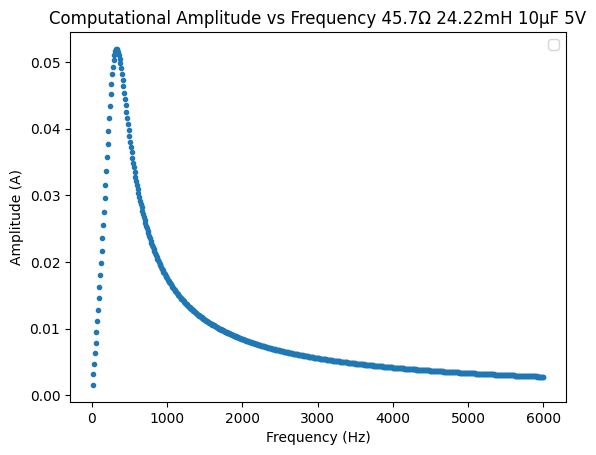

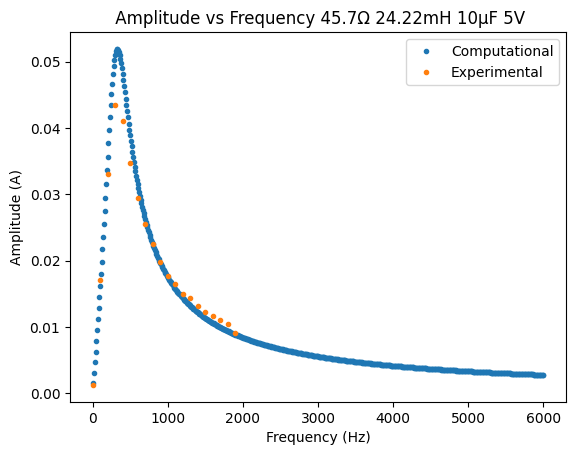

100%|██████████| 600/600 [00:06<00:00, 91.72it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


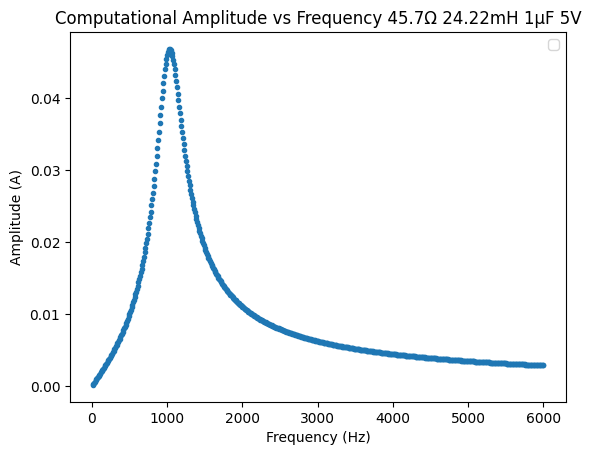

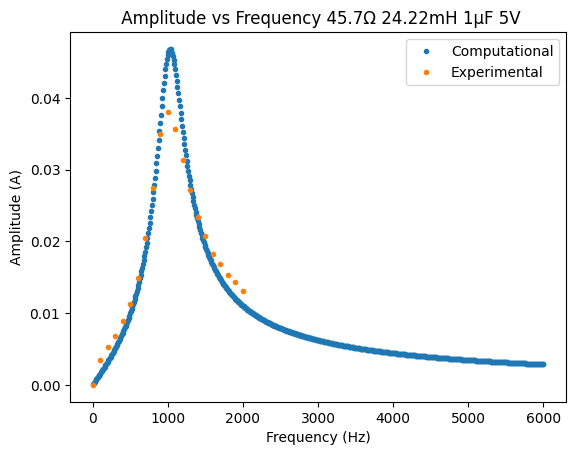

  0%|          | 0/600 [00:00<?, ?it/s]/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_79793/69793562.py:10: RuntimeWarning: overflow encountered in scalar divide
  return voltage * math.sin(angular_frequency * t) / inductance / 2 - resistance * current / inductance - charge / (inductance * capacitance) - 0.05 * current / (angular_frequency * inductance * capacitance)
/Users/kyang25/Documents/Computer/Python/HonorsPhysics2/Unit0/model_utils.py:13: RuntimeWarning: invalid value encountered in scalar add
  velocities.append(velocities[-1] + accelerations[-1] * (times[i + 1] - times[i]))
100%|██████████| 600/600 [00:06<00:00, 91.74it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


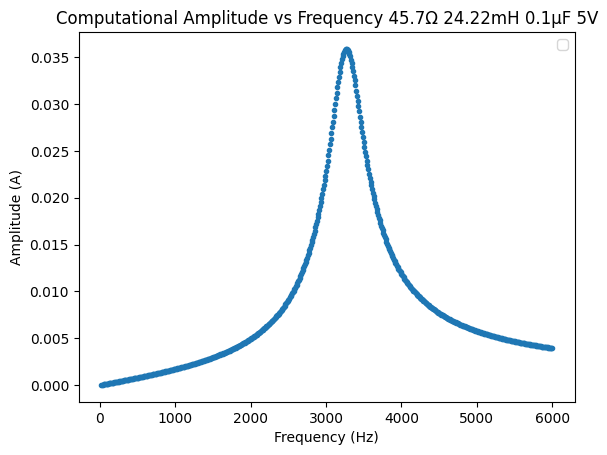

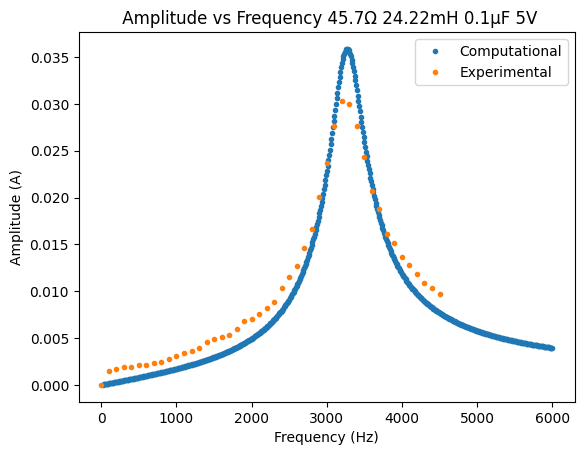

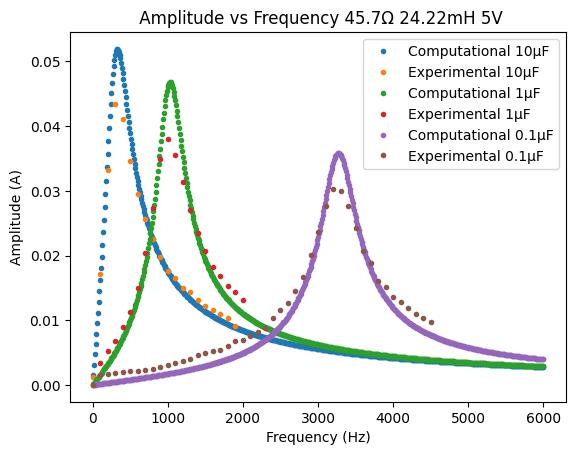

In [44]:
compute_models(resistance[0], inductance, capacitance, voltage[0])